In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Read the data using pandas
data = pd.read_csv('cms_scrape.csv')

In [3]:
#display the data in a table
data

,Champion,Role,Win Percent,Play Percent,Ban Rate,Kills,Deaths,Assists,Largest Killing Spree,Damage Dealt,Damage Taken,Total Healing,Minions Killed,Gold Earned
0,Ezreal,ADC,0.495291,0.158951,0.031033,6.765204,5.266640,7.515563,10,22941,17961,2648,177.937111,11875
1,Lee Sin,Jungle,0.467825,0.122620,0.016842,6.210739,5.416718,7.679185,8,12270,25711,7389,25.684461,10199
2,Thresh,Support,0.489029,0.119093,0.012806,1.965701,5.581487,12.631870,5,6900,16274,1797,31.865360,7371
3,Kai'Sa,ADC,0.491235,0.094800,0.001928,7.431955,5.633347,6.884384,9,19746,18665,3893,186.219457,12352
4,Lulu,Support,0.514718,0.093950,0.020948,1.495544,4.579935,13.258304,3,5255,11887,1946,23.955847,7290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Ziggs,Middle,0.494297,0.006673,0.000140,5.513308,5.511407,7.880228,5,25360,16327,1583,185.467681,11817
175,Karthus,Middle,0.493097,0.006432,0.007121,7.232742,6.899408,8.335306,7,28247,22457,5188,183.138067,12193
176,Jax,Support,0.487129,0.006406,0.009339,3.035644,3.596040,1.538614,4,7688,11621,1738,103.308911,6670
177,Mordekaiser,Support,0.470238,0.006394,0.009622,2.634921,3.418651,1.765873,6,8165,11688,2587,100.984127,6246


In [4]:
import seaborn as sns

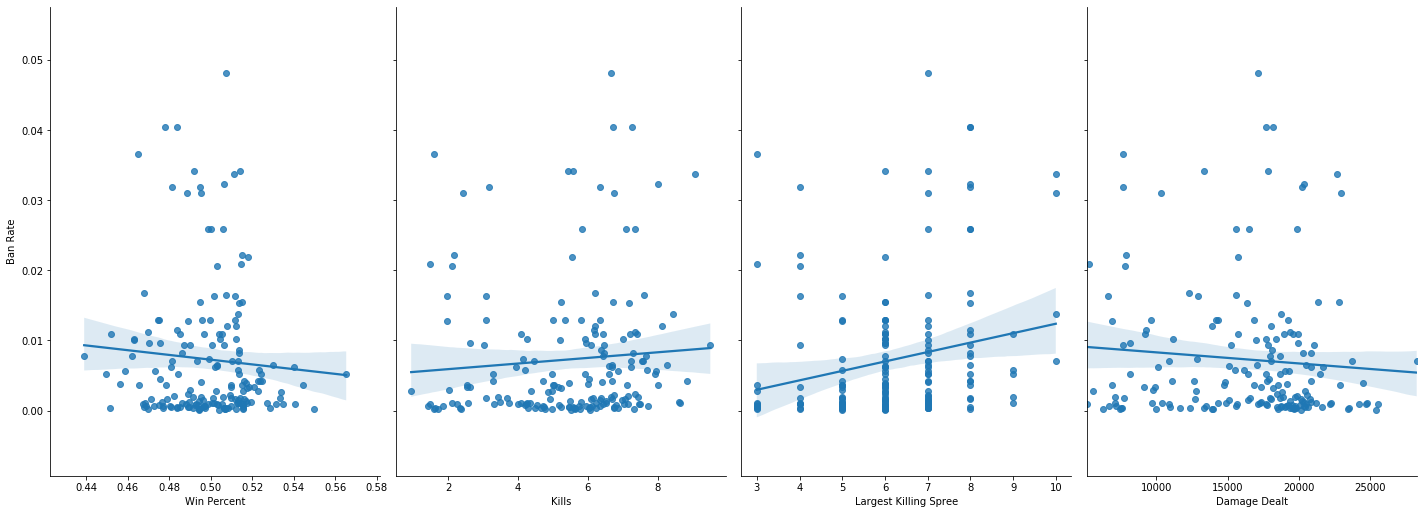

In [5]:
sns.pairplot(data, x_vars=['Win Percent', 'Kills', 'Largest Killing Spree', 'Damage Dealt'], y_vars='Ban Rate', height=7, aspect=0.7, kind='reg')

Used linear regression to investigate if the win percentage, kills, largest killing spree, and damage dealt of a champion has any correlations with the ban rate of the champion. The graphs show that there is no correlation between the variables individually with the ban rate of a champion. I had previously hypothesized that if a champion is very successful and performs very well in games, then the champion would have a higher ban rate since players may want to prevent the opposing team from picking the champion. However, this is not the case and may be because although a champion has good statistics, it does not ensure that the player will perform well on the champion. Players may instead ban champions that are strong counters to the champion that they want to play rather than champions with high statistics. 

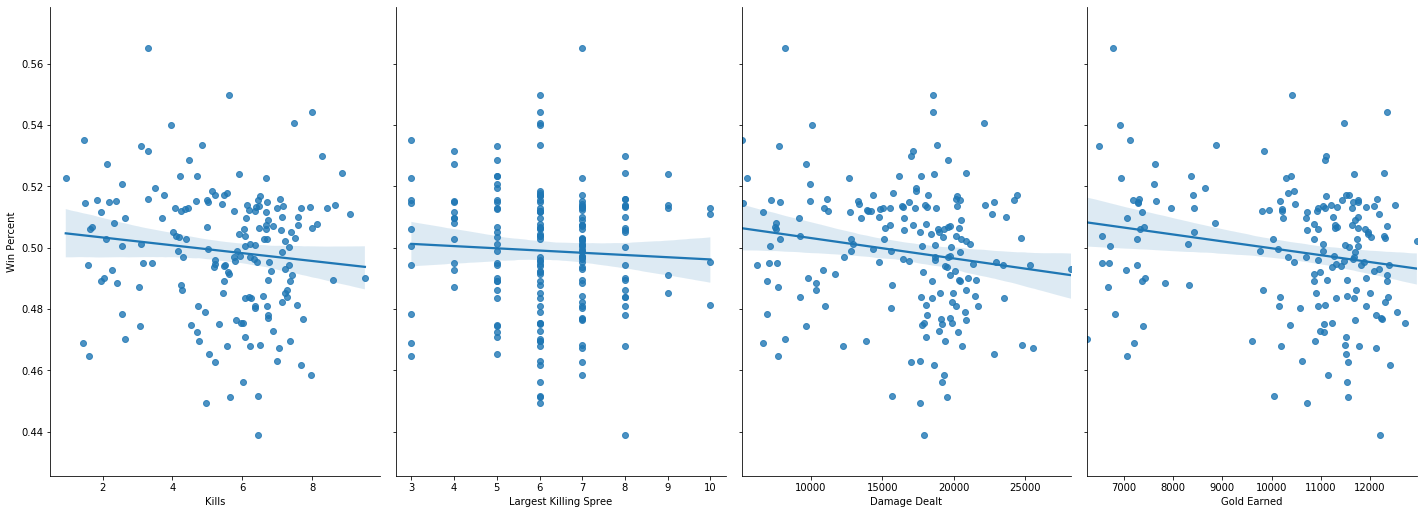

In [6]:
sns.pairplot(data, x_vars=['Kills', 'Largest Killing Spree', 'Damage Dealt', 'Gold Earned'], y_vars='Win Percent', height=7, aspect=0.7, kind='reg')

Used linear regression to investigate if the kills, largest killing spree, damage dealt, and gold earned of a champion has any correlation with their win percentage. The graphs show that these variables individually have no correlation with the win percentage of a champion. This is because there are many factors together that determine the winners of a game. Although a champion may have high amount of kills, damage dealt, gold earned, and largest killing spree, they may still lose the game due to other variables such as poor communication and teamwork or not securing objectives in the game. 

In [7]:
goldEarned = data['Gold Earned'].values.reshape(-1, 1)
damageDealt = data['Damage Dealt'].values.reshape(-1, 1)
kills = data['Kills'].values.reshape(-1,1)

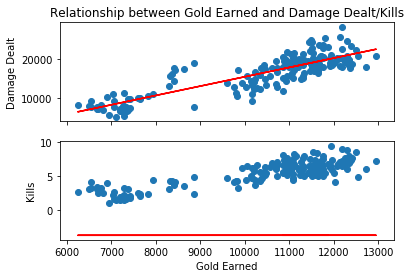

In [8]:
#Create scatter plots
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.scatter(goldEarned, damageDealt)
ax2.scatter(goldEarned, kills)

ax1.set_title('Relationship between Gold Earned and Damage Dealt/Kills')

ax2.set_xlabel('Gold Earned')
ax1.set_ylabel('Damage Dealt')
ax2.set_ylabel('Kills')

#Use sklearn to create linear regression line
linreg = LinearRegression()
linreg.fit(goldEarned, damageDealt)
damageDealt_pred = linreg.predict(goldEarned)
ax1.plot(goldEarned, damageDealt_pred, color="red")

linreg2 = LinearRegression()
linreg2.fit(goldEarned, kills)
kills_pred = linreg2.predict(kills)
ax2.plot(goldEarned, kills_pred, color="red")

Used linear regression to investigate if there is a correlation between Gold Earned and Damage Dealt/Kills. The graphs show that there is a strong positive correlation. This is because as champions earn more gold, they are able to purchase items that allow them to deal more damage to the enemy which consequently also leads to more kills. 

[7.067769897557132, 5.465130023640662, 6.2107386716325275, 6.732803906708911, 2.595291059911202]
[5.9026104417670675, 5.790419161676646, 5.374480712166172, 5.872598757587822, 5.070356957111321]


Text(0, 0.5, 'Gold Earned')

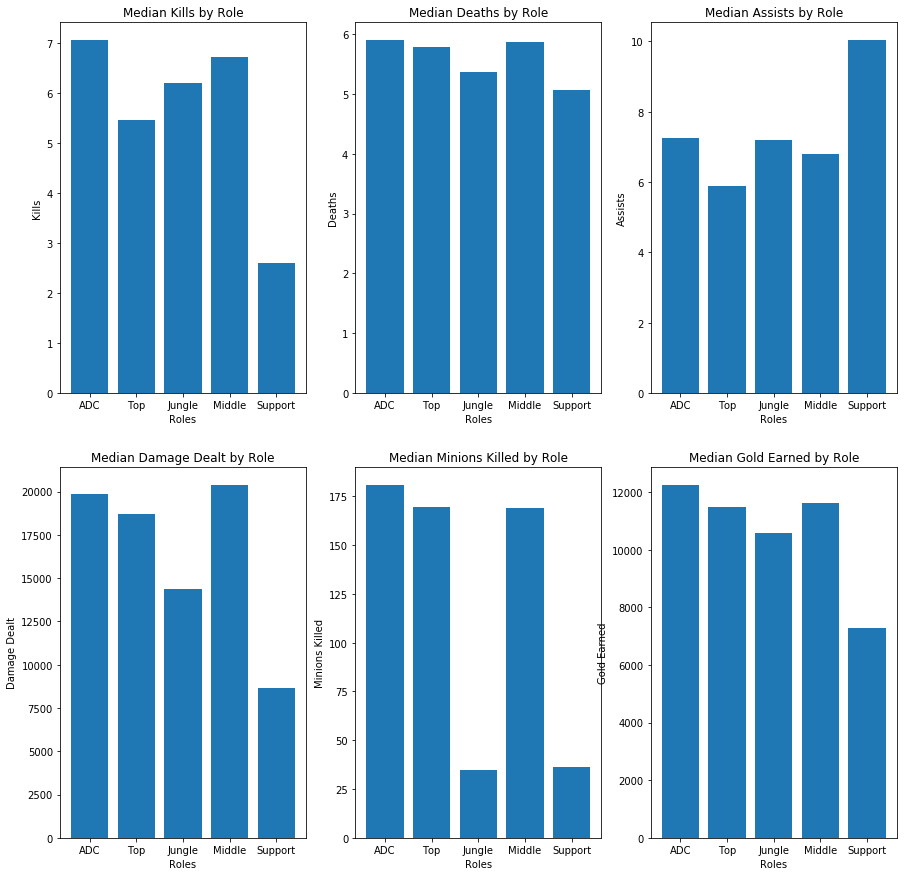

In [9]:
#Filter data by role
adc_data = (data['Role'] == 'ADC')
top_data = (data['Role'] == 'Top')
jungle_data = (data['Role'] == 'Jungle')
middle_data = (data['Role'] == 'Middle')
support_data = (data['Role'] == 'Support')

Roles = ['ADC', 'Top', 'Jungle', 'Middle', 'Support']

#Append the median kills of champions from each role into a list
kills_Median = []
kills_Median.append(data.loc[adc_data, 'Kills'].median())
kills_Median.append(data.loc[top_data, 'Kills'].median())
kills_Median.append(data.loc[jungle_data, 'Kills'].median())
kills_Median.append(data.loc[middle_data, 'Kills'].median())
kills_Median.append(data.loc[support_data, 'Kills'].median())
print(kills_Median)

#Append the median deaths of champions from each role into a list
deaths_Median = []
deaths_Median.append(data.loc[adc_data, 'Deaths'].median())
deaths_Median.append(data.loc[top_data, 'Deaths'].median())
deaths_Median.append(data.loc[jungle_data, 'Deaths'].median())
deaths_Median.append(data.loc[middle_data, 'Deaths'].median())
deaths_Median.append(data.loc[support_data, 'Deaths'].median())
print(deaths_Median)

#Append the median assists of champions from each role into a list
assists_Median = []
assists_Median.append(data.loc[adc_data, 'Assists'].median())
assists_Median.append(data.loc[top_data, 'Assists'].median())
assists_Median.append(data.loc[jungle_data, 'Assists'].median())
assists_Median.append(data.loc[middle_data, 'Assists'].median())
assists_Median.append(data.loc[support_data, 'Assists'].median())

#Append the median damage dealt of champions from each role into a list
damage_Median = []
damage_Median.append(data.loc[adc_data, 'Damage Dealt'].median())
damage_Median.append(data.loc[top_data, 'Damage Dealt'].median())
damage_Median.append(data.loc[jungle_data, 'Damage Dealt'].median())
damage_Median.append(data.loc[middle_data, 'Damage Dealt'].median())
damage_Median.append(data.loc[support_data, 'Damage Dealt'].median())

#Append the median number of minions killed of champions from each role into a list
minions_Median = []
minions_Median.append(data.loc[adc_data, 'Minions Killed'].median())
minions_Median.append(data.loc[top_data, 'Minions Killed'].median())
minions_Median.append(data.loc[jungle_data, 'Minions Killed'].median())
minions_Median.append(data.loc[middle_data, 'Minions Killed'].median())
minions_Median.append(data.loc[support_data, 'Minions Killed'].median())

#Append the median gold earned of champions from each role into the list
gold_Median = []
gold_Median.append(data.loc[adc_data, 'Gold Earned'].median())
gold_Median.append(data.loc[top_data, 'Gold Earned'].median())
gold_Median.append(data.loc[jungle_data, 'Gold Earned'].median())
gold_Median.append(data.loc[middle_data, 'Gold Earned'].median())
gold_Median.append(data.loc[support_data, 'Gold Earned'].median())

#Create bar charts
fig2, ax_arr = plt.subplots(nrows=2, ncols=3, figsize=(15,15))

ax_arr[0][0].bar(Roles, kills_Median)
ax_arr[0][0].set_title('Median Kills by Role')
ax_arr[0][0].set_xlabel('Roles')
ax_arr[0][0].set_ylabel('Kills')

ax_arr[0][1].bar(Roles, deaths_Median)
ax_arr[0][1].set_title('Median Deaths by Role')
ax_arr[0][1].set_xlabel('Roles')
ax_arr[0][1].set_ylabel('Deaths')

ax_arr[0][2].bar(Roles, assists_Median)
ax_arr[0][2].set_title('Median Assists by Role')
ax_arr[0][2].set_xlabel('Roles')
ax_arr[0][2].set_ylabel('Assists')

ax_arr[1][0].bar(Roles, damage_Median)
ax_arr[1][0].set_title('Median Damage Dealt by Role')
ax_arr[1][0].set_xlabel('Roles')
ax_arr[1][0].set_ylabel('Damage Dealt')

ax_arr[1][1].bar(Roles, minions_Median)
ax_arr[1][1].set_title('Median Minions Killed by Role')
ax_arr[1][1].set_xlabel('Roles')
ax_arr[1][1].set_ylabel('Minions Killed')

ax_arr[1][2].bar(Roles, gold_Median)
ax_arr[1][2].set_title('Median Gold Earned by Role')
ax_arr[1][2].set_xlabel('Roles')
ax_arr[1][2].set_ylabel('Gold Earned')


Text(0, 0.5, 'Frequency')

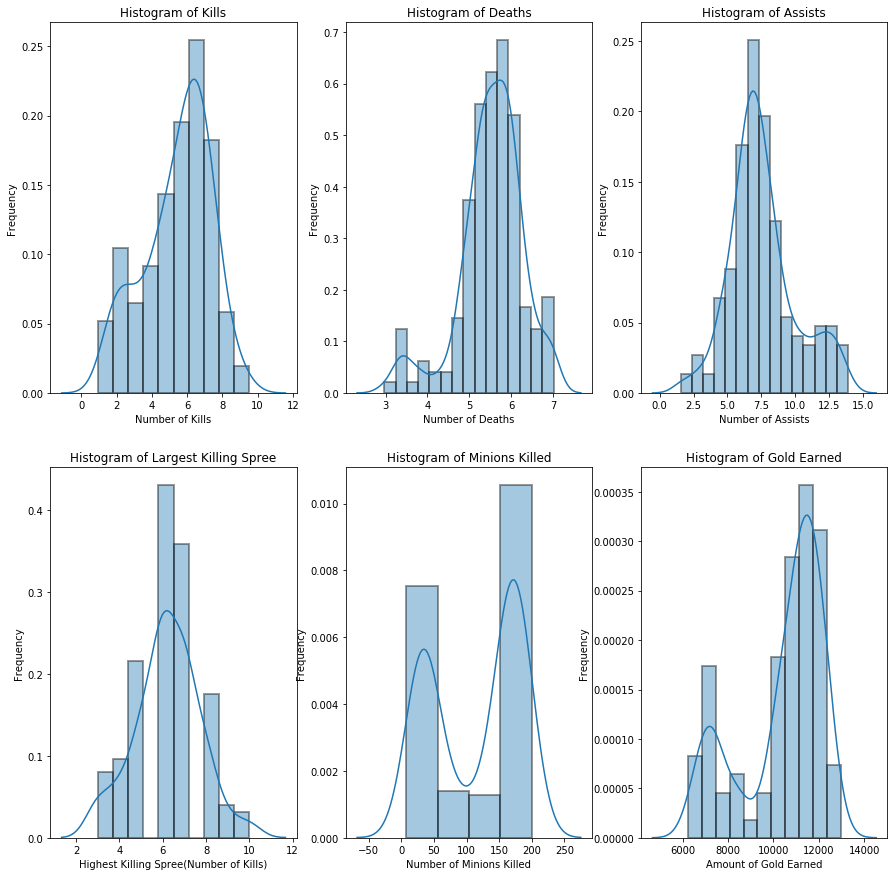

In [25]:
deaths = data['Deaths']
assists = data['Assists']
lks = data['Largest Killing Spree']
minionsKilled = data['Minions Killed']

#Create histograms
fig3, ax_arr2 = plt.subplots(nrows=2, ncols=3, figsize=(15,15))

sns.distplot(kills, ax=ax_arr2[0][0], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[0][0].set_title('Histogram of Kills')
ax_arr2[0][0].set_xlabel('Number of Kills')
ax_arr2[0][0].set_ylabel('Frequency')

sns.distplot(deaths, ax=ax_arr2[0][1], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[0][1].set_title('Histogram of Deaths')
ax_arr2[0][1].set_xlabel('Number of Deaths')
ax_arr2[0][1].set_ylabel('Frequency')

sns.distplot(assists, ax=ax_arr2[0][2], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[0][2].set_title('Histogram of Assists')
ax_arr2[0][2].set_xlabel('Number of Assists')
ax_arr2[0][2].set_ylabel('Frequency')

sns.distplot(lks, ax=ax_arr2[1][0], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[1][0].set_title('Histogram of Largest Killing Spree')
ax_arr2[1][0].set_xlabel('Highest Killing Spree(Number of Kills)')
ax_arr2[1][0].set_ylabel('Frequency')

sns.distplot(minionsKilled, ax=ax_arr2[1][1], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[1][1].set_title('Histogram of Minions Killed')
ax_arr2[1][1].set_xlabel('Number of Minions Killed')
ax_arr2[1][1].set_ylabel('Frequency')

sns.distplot(goldEarned, ax=ax_arr2[1][2], hist_kws=dict(edgecolor="black", linewidth=2))
ax_arr2[1][2].set_title('Histogram of Gold Earned')
ax_arr2[1][2].set_xlabel('Amount of Gold Earned')
ax_arr2[1][2].set_ylabel('Frequency')

Histogram of Kills:
    Based on our data, the distribution of average number of kills of champions is unimodal and slightly skewed left. The distribution appears to be centered around 6-7 kills, with values ranging from approximately 1 to 9 kills, and there are no apparent outliers,
    
Histogram of Deaths:
    Based on our data, the distriution of average number of deaths of champions is unimodal and skewed to the left. The distribution appears to be centered around 5.5 deaths, with values ranging from approximately 3 to 7 deaths, and there are no apparent outliers.
 
Histogram of Assists:
    Based on our data, the distriution of average number of assists of champions is unimodal, approximately symmetic and bell-shaped. The distribution appears to be centered around 6-7 assists, with values ranging from approximately 2 to 13 assists, and there are no apparent outliers.

Histogram of Largest Killing Spree:
    Based on our data, the distriution of average highest killing spree of a champion in number of kills is unimodal, approximately symmetric and bell-shaped. The distribution appears to be centered around 6-7 kills, with values ranging from approximately 3 to 10 kills, and there are no apparent outliers.

Histogram of Minions Killed:
    Based on our data, the distriution of average highest killing spree of a champion in number of kills is bimodal and approximately symmetric. The distribution appears to be centered around 100 minions, with values ranging from approximately 0 to 200 minions kills, and there are no apparent outliers.

Histogram of Gold Earned:
    Based on our data, the distriution of average highest killing spree of a champion in number of kills is bimodal and skewed to the left. The distribution appears to be centered around 11000 gold, with values ranging from approximately 6000 to 13000, and there are no apparent outliers.